# **Import**

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# **Data Load**

In [ ]:
cd /content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data

/content/drive/MyDrive/[Projects]/Kaggle/NASA 터보팬 제트 엔진의 잔존 수명 예측 및 예지보전 방안/Data


In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f's_{i + 1}' for i in range(21)]
col_names = index_names + setting_names + sensor_names

train_df = pd.read_csv('./train_FD002.txt',
                       sep='\s+',
                       header=None,
                       index_col=False,
                       names=col_names)
test_df = pd.read_csv('./test_FD002.txt',
                      sep='\s+',
                      index_col=False,
                      names=col_names)
RUL_df = pd.read_csv('./RUL_FD002.txt',
                     sep='\s+',
                     index_col=False,
                     names=['RUL'])

In [ ]:
train_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [ ]:
train_df.to_csv('./train_FD002.csv')

In [ ]:
test_df

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,371.69,2388.18,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,315.32,2388.12,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,183.04,2387.75,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,130.40,2387.72,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,164.56,2028.05,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33986,259,119,35.0015,0.8403,100.0,449.44,555.56,1366.01,1129.47,5.48,...,183.05,2388.39,8088.36,9.3215,0.02,334,2223,100.00,14.94,8.9065
33987,259,120,42.0066,0.8405,100.0,445.00,549.42,1351.13,1123.86,3.91,...,130.74,2388.31,8108.48,9.3542,0.02,332,2212,100.00,10.57,6.4075
33988,259,121,42.0061,0.8400,100.0,445.00,549.65,1349.14,1118.91,3.91,...,130.96,2388.34,8098.77,9.3836,0.02,331,2212,100.00,10.57,6.4805
33989,259,122,0.0024,0.0003,100.0,518.67,642.58,1589.61,1408.16,14.62,...,522.25,2388.00,8161.85,8.4279,0.03,393,2388,100.00,39.08,23.3589


In [ ]:
test_df.to_csv('./test_FD002.csv')

In [ ]:
RUL_df

,RUL
0,18
1,79
2,106
3,110
4,15
...,...
254,122
255,191
256,56
257,131


In [ ]:
RUL_df.to_csv('./RUL_FD002.csv')

# **EDA**

## **s1 ~ s21**

In [ ]:
max_cycle = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycle.columns = ['unit_number', 'max_cycle']

train_df = train_df.merge(max_cycle, on='unit_number', how='left')

train_df['RUL'] = train_df['max_cycle'] - train_df['time_cycles']

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data_rolling = unit_data.rolling(10).mean()
        plt.plot(unit_data_rolling['RUL'], unit_data_rolling[sensor], alpha=0.7)

        sensor_values.extend(unit_data_rolling[sensor].dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(sensor)
    plt.title(f'Trend of {sensor} Across Sampled Units (Std: {sensor_std:.2f})')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    sensor_values = []
    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).mean()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

        sensor_values.extend(sensor_norm_rolling.dropna().values)
    sensor_std = np.std(sensor_values)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling mean)')
    plt.title(f'Normalized Trend of {sensor} Across Units (Std: {sensor_std:.2f})')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()

        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        sensor_norm = (unit_data[sensor] - unit_data[sensor].min()) / \
                      (unit_data[sensor].max() - unit_data[sensor].min())
        sensor_norm_rolling = sensor_norm.rolling(10).std()
        plt.plot(unit_data['RUL'], sensor_norm_rolling, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'Normalized {sensor} (rolling std)')
    plt.title(f'Normalized Trend of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
units = train_df['unit_number'].unique()

for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        plt.plot(unit_data['RUL'], unit_data['rolling_std'], alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Rolling Std (window=10)')
    plt.title(f'Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for sensor in sensor_names:
    plt.figure(figsize=(13, 5))

    for unit in units:
        unit_data = train_df[train_df['unit_number'] == unit][['RUL', sensor]]
        unit_data['rolling_std'] = unit_data[sensor].rolling(10).std()
        rolling_std_norm = (unit_data['rolling_std'] - unit_data['rolling_std'].min()) / \
                           (unit_data['rolling_std'].max() - unit_data['rolling_std'].min())
        plt.plot(unit_data['RUL'], rolling_std_norm, alpha=0.7)

    plt.xlim(train_df['RUL'].max(), 0)
    plt.xlabel('Remaining Useful Life')
    plt.ylabel(f'{sensor} Normalized Rolling Std')
    plt.title(f'Normalized Rolling Std of {sensor} Across Units')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

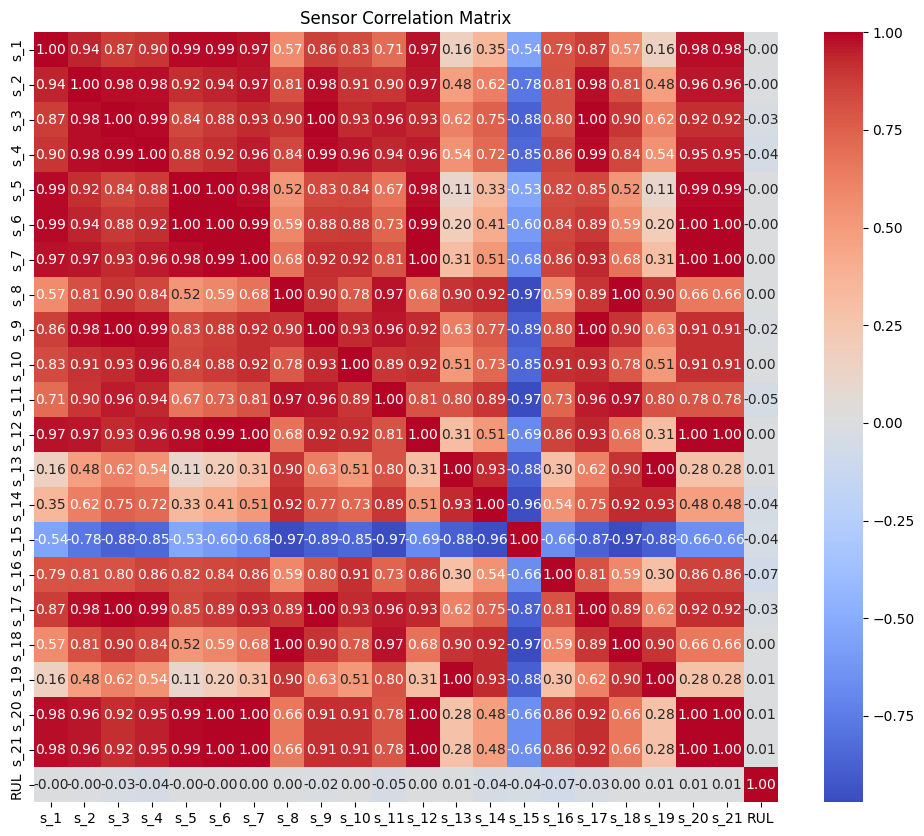

In [ ]:
sensor_data = train_df[sensor_names + ['RUL']]
corr = sensor_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Sensor Correlation Matrix")
plt.show()

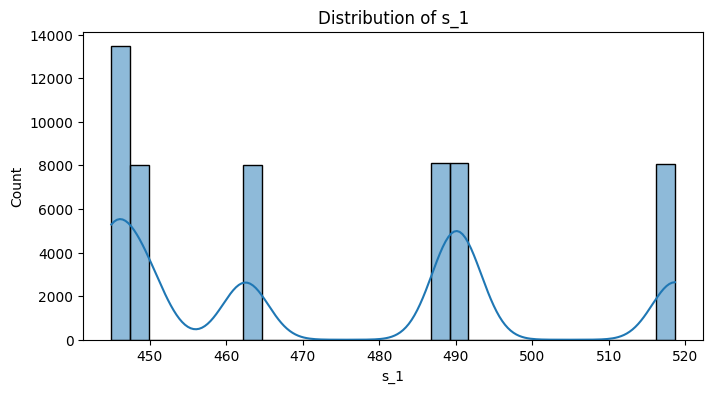

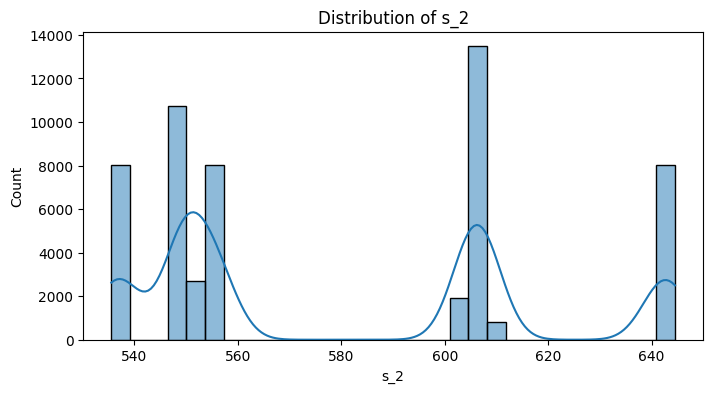

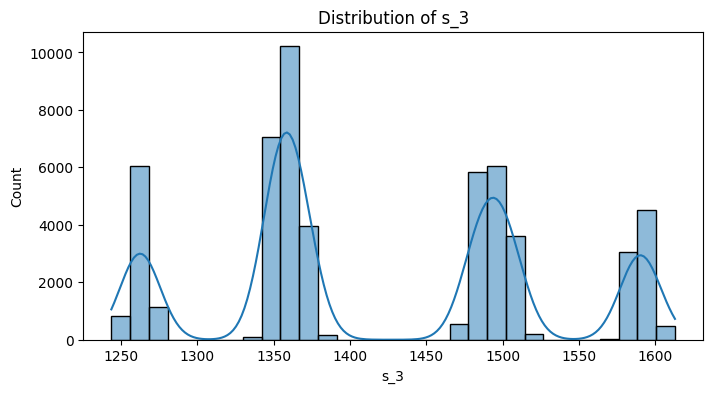

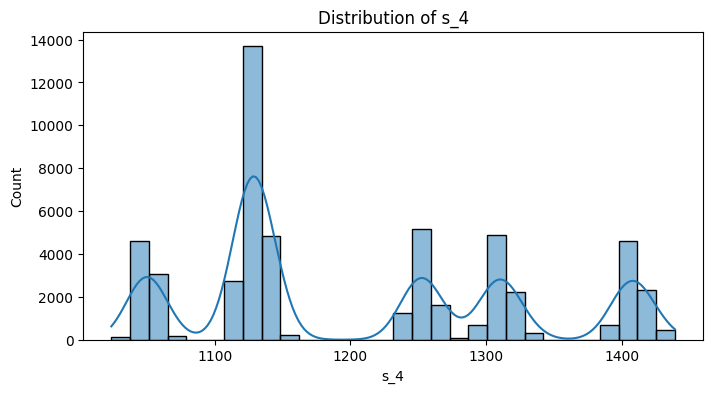

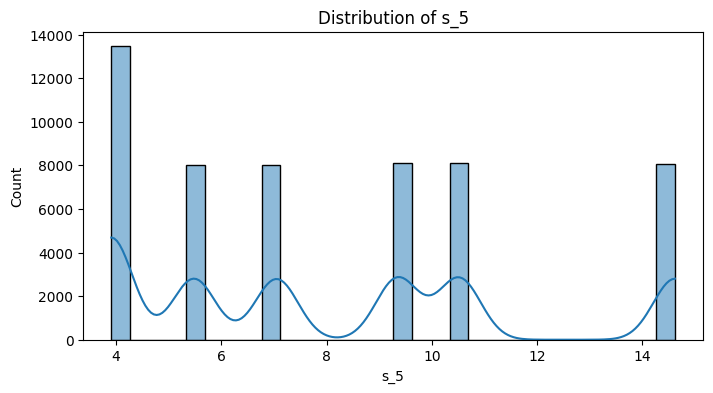

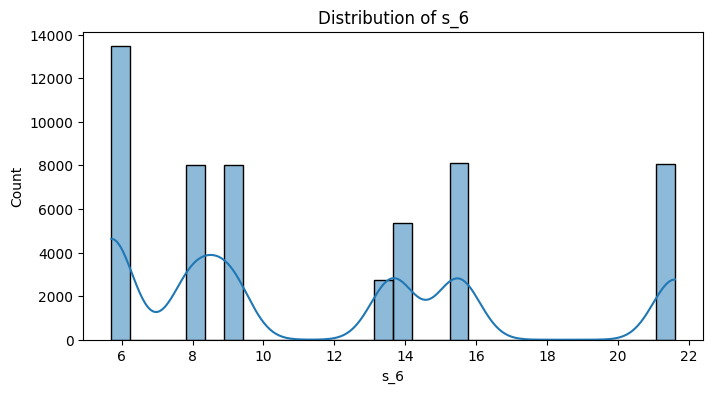

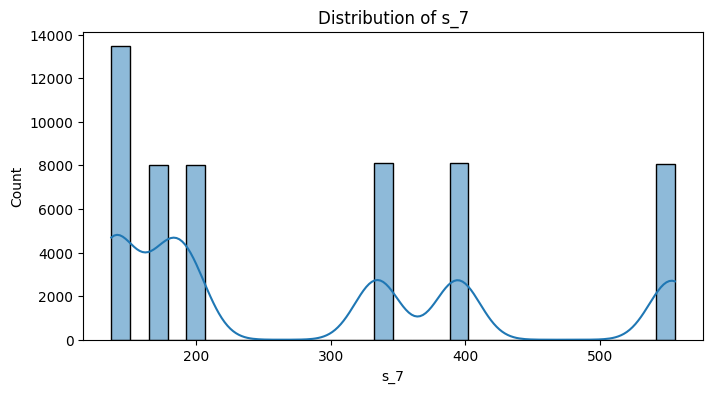

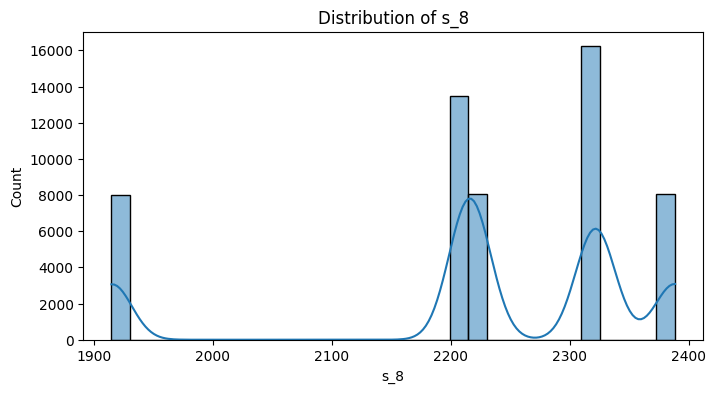

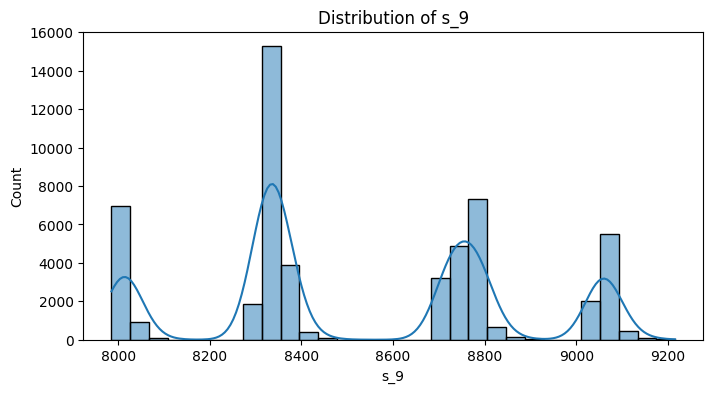

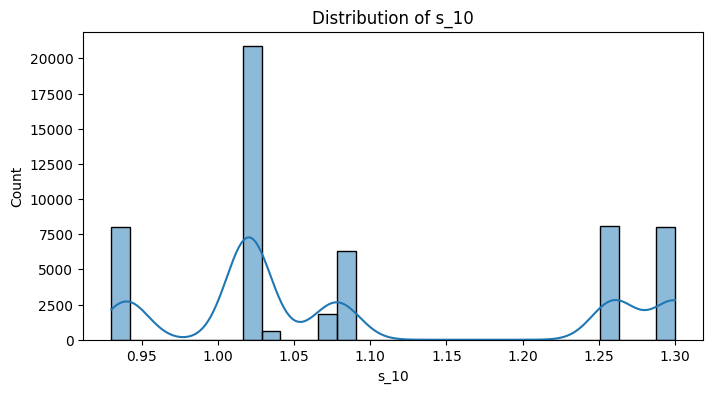

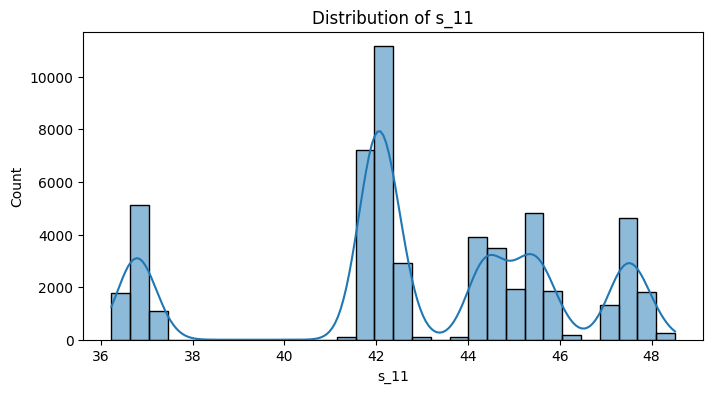

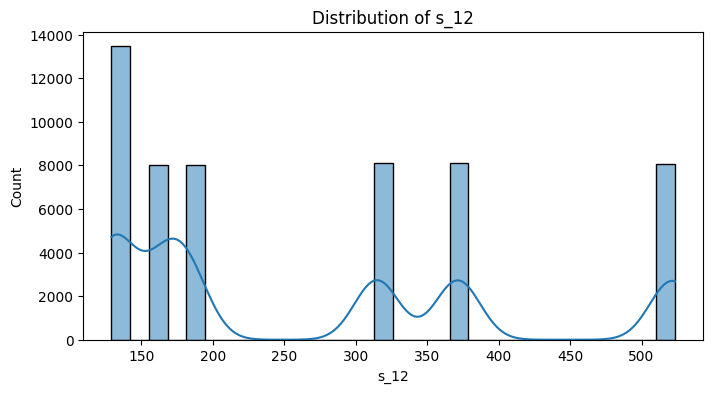

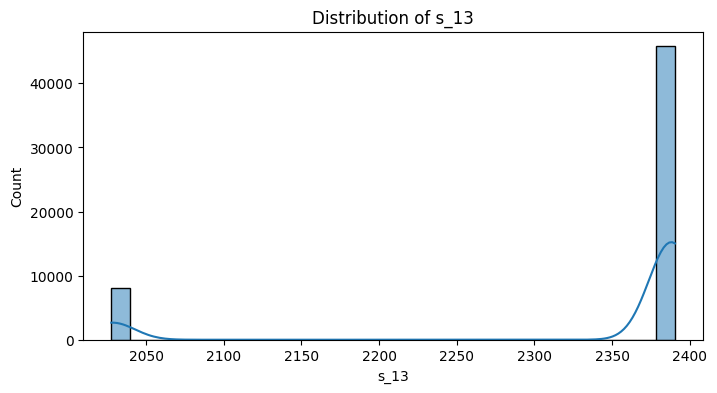

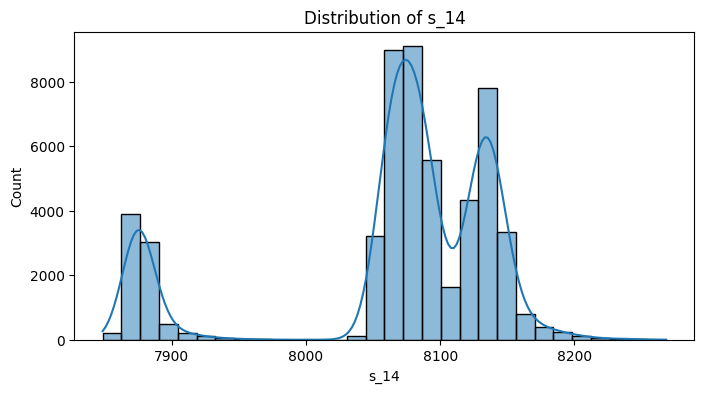

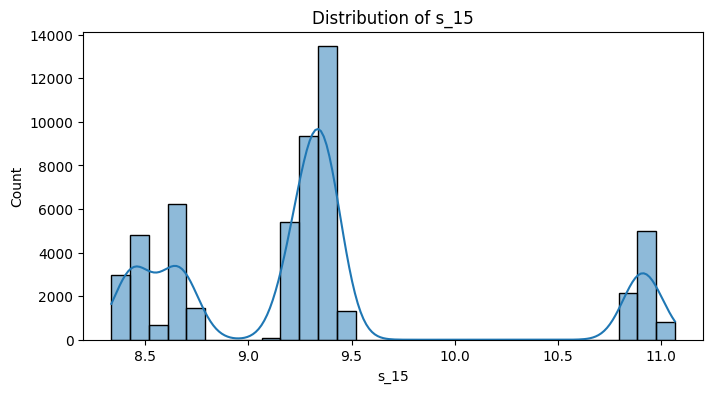

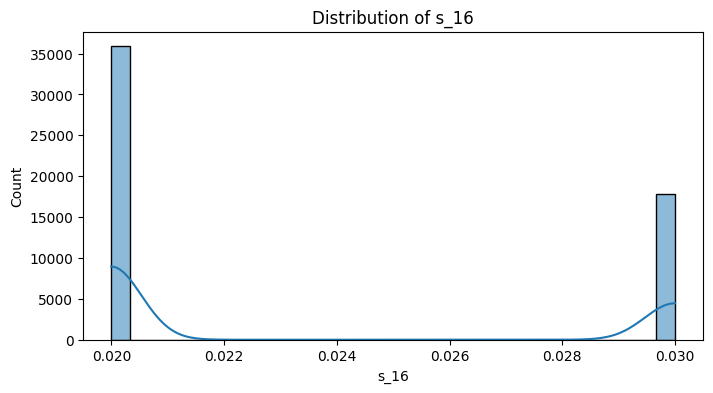

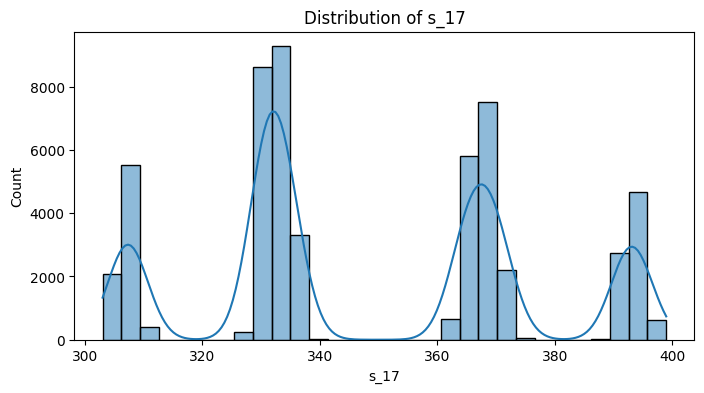

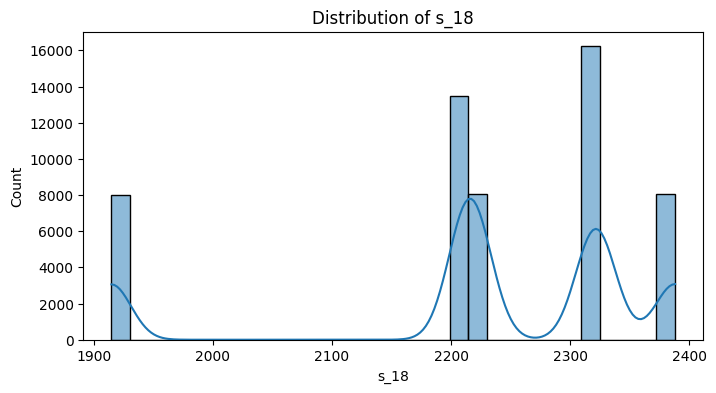

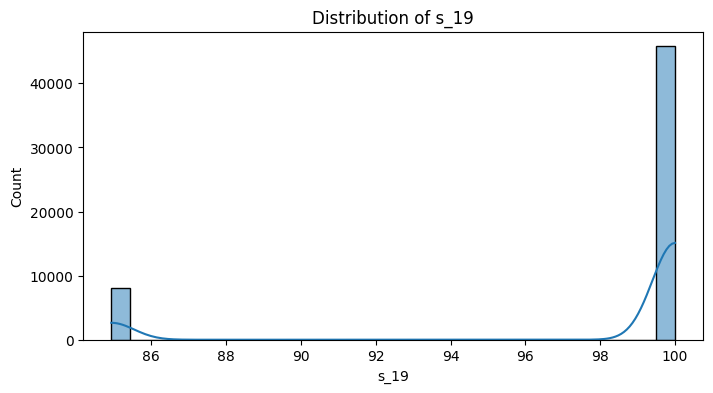

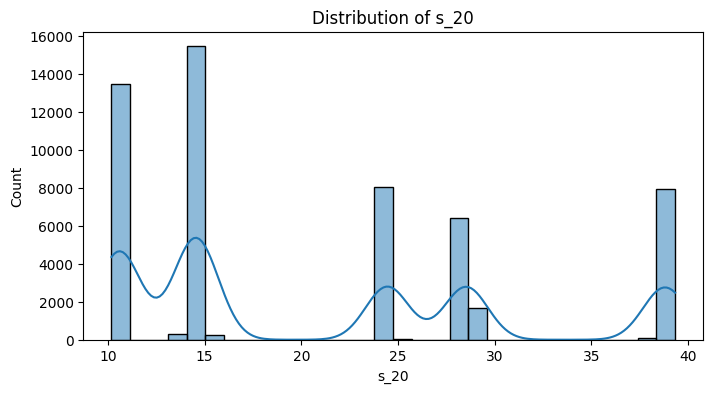

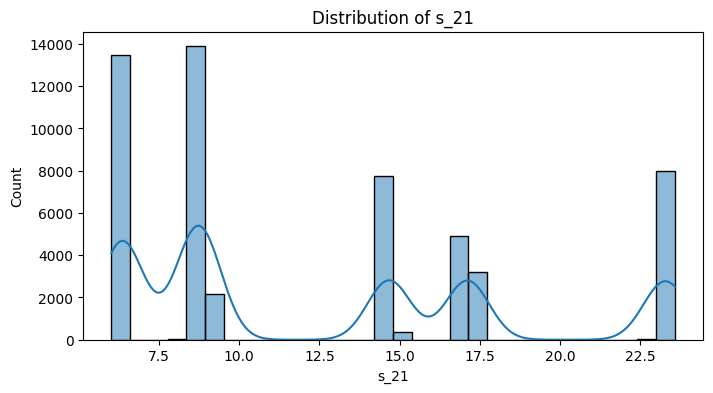

In [ ]:
for sensor in sensor_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.show()